# Task 3 - US Healthcare Readmissions and Mortality
Author: [Adrian Vega](https://github.com/adriacv17) <br >Respository: [datafun-06-projects](https://github.com/adriacv17/datafun-06-projects) <br> Data: 09/28/2023 <br>Custom Exporatory Data Project

## Section 1-Load - Read from a data file into a pandas DataFrame.

In [300]:
import pandas as pd # import pandas library
import numpy as np # import numpy library
import statistics as stats #import statistics library

labvaluesdf = pd.read_csv('HepatitisCdata.csv', index_col=0) # Create DataFrame from csv file

#rename columns for clarity on lab test
labvaluesdf.columns = ['Category', 'Age', 'Sex', 'Albumin', 'Alkaline Phosphatase',
                        'Alanine Transaminase', 'Aspartate Transamimase', 'Bilirubin',
                          'Acetylcholinesterase', 'Cholesterol', 'Creatinine',
                            'Gamma-Glutamyl Transferase', 'Proteins']

labvaluesdf # call labvaluesdf DataFrame

,Category,Age,Sex,Albumin,Alkaline Phosphatase,Alanine Transaminase,Aspartate Transamimase,Bilirubin,Acetylcholinesterase,Cholesterol,Creatinine,Gamma-Glutamyl Transferase,Proteins
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


## Section 2-View - Display the first 5 rows and the last 5 rows.

In [301]:
labvaluesdf.head(5) #display first 5 rows

,Category,Age,Sex,Albumin,Alkaline Phosphatase,Alanine Transaminase,Aspartate Transamimase,Bilirubin,Acetylcholinesterase,Cholesterol,Creatinine,Gamma-Glutamyl Transferase,Proteins
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [302]:
labvaluesdf.tail(5) #display last 5 rows

,Category,Age,Sex,Albumin,Alkaline Phosphatase,Alanine Transaminase,Aspartate Transamimase,Bilirubin,Acetylcholinesterase,Cholesterol,Creatinine,Gamma-Glutamyl Transferase,Proteins
611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0
615,3=Cirrhosis,59,f,36.0,NaN,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0


## Section 3-Describe: Use the DataFrame describe() function to calculate basic descriptive statistics for all numeric columns. 

In [303]:
pd.set_option('display.precision', 2) # format for floating-point values

labvaluesdf.describe()  # get basic descriptive statistics using describe() funtion using default numeric columns

,Age,Albumin,Alkaline Phosphatase,Alanine Transaminase,Aspartate Transamimase,Bilirubin,Acetylcholinesterase,Cholesterol,Creatinine,Gamma-Glutamyl Transferase,Proteins
count,615.00,614.00,597.00,614.00,615.00,615.00,615.00,605.00,615.00,615.00,614.00
mean,47.41,41.62,68.28,28.45,34.79,11.40,8.20,5.37,81.29,39.53,72.04
std,10.06,5.78,26.03,25.47,33.09,19.67,2.21,1.13,49.76,54.66,5.40
min,19.00,14.90,11.30,0.90,10.60,0.80,1.42,1.43,8.00,4.50,44.80
25%,39.00,38.80,52.50,16.40,21.60,5.30,6.94,4.61,67.00,15.70,69.30
50%,47.00,41.95,66.20,23.00,25.90,7.30,8.26,5.30,77.00,23.30,72.20
75%,54.00,45.20,80.10,33.08,32.90,11.20,9.59,6.06,88.00,40.20,75.40
max,77.00,82.20,416.60,325.30,324.00,254.00,16.41,9.67,1079.10,650.90,90.00


## Section 4-Series: Use the Series method describe() to calculate the descriptive stats for all category/text columns.

In [304]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html for help with library

labvaluesdf.describe(exclude=[np.number]) #Excluding numeric columns from a DataFrame description.

,Category,Sex
count,615,615
unique,5,2
top,0=Blood Donor,m
freq,533,377


In [305]:
labvaluesdf.describe(include='object') #Including only objects from pandas.pydata.org

,Category,Sex
count,615,615
unique,5,2
top,0=Blood Donor,m
freq,533,377


## Section 5-Unique: Use the Series method unique() to get unique category values. 

In [306]:
unique_category = labvaluesdf['Category'].unique() #Category/Type of the patient. Call all unique values
print(unique_category)

['0=Blood Donor' '0s=suspect Blood Donor' '1=Hepatitis' '2=Fibrosis'
 '3=Cirrhosis']


In [307]:
unique_sex = labvaluesdf['Sex'].unique() # m = male, f = female,  Call all unique values
print(unique_sex)

['m' 'f']


## Section 6-Histograms: Use the DataFrame's hist() function to create a histogram for each numerical column.

Text(0.5, 0, 'Age')

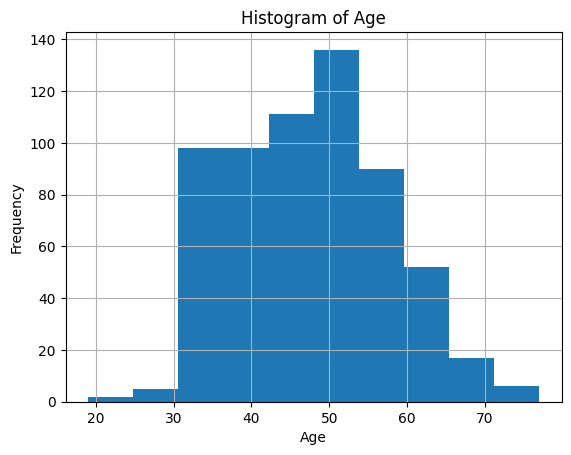

In [308]:
import matplotlib.pyplot as plt

#enable Matplotlib support
%matplotlib inline

#Histogram for age as it does not have same y-axis label

histogram = labvaluesdf['Age'].hist()
plt.title('Histogram of Age') # set title
plt.ylabel('Frequency') #label Y axis
plt.xlabel('Age') #label X axis



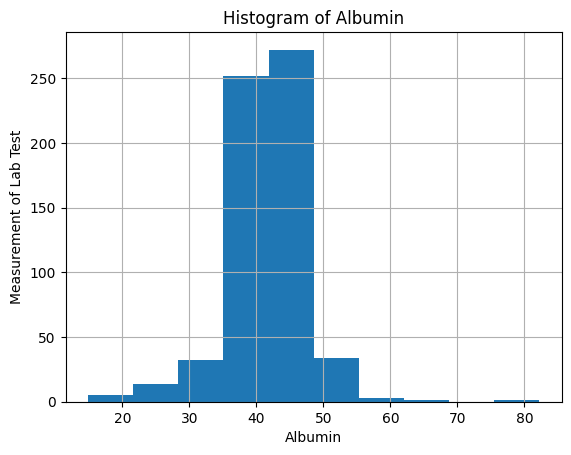

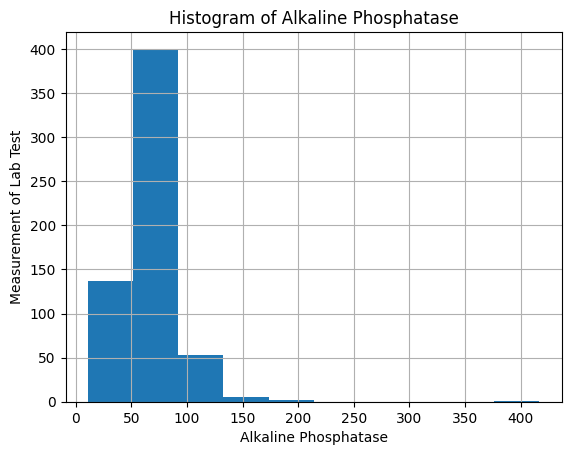

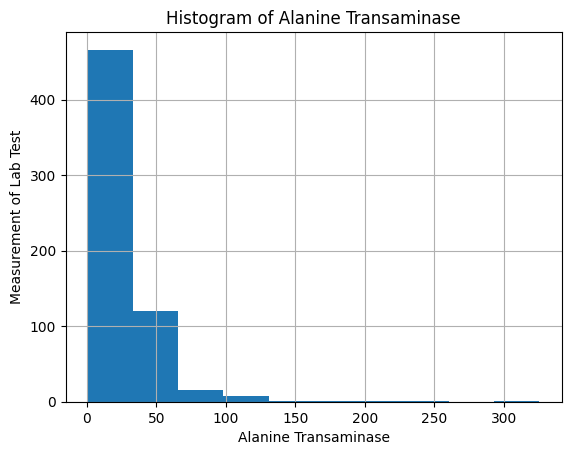

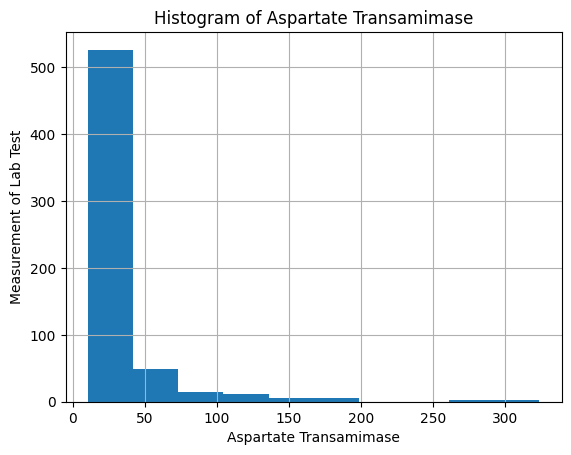

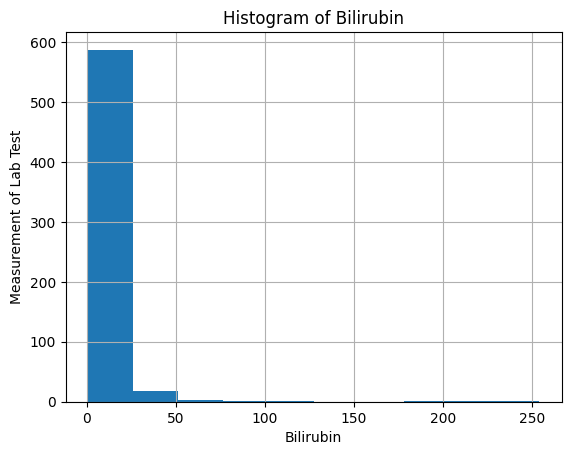

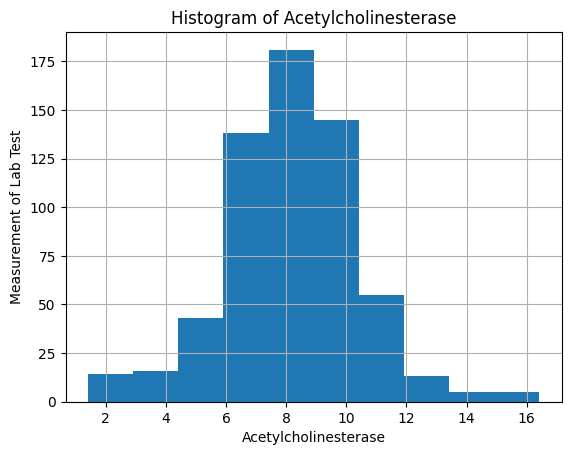

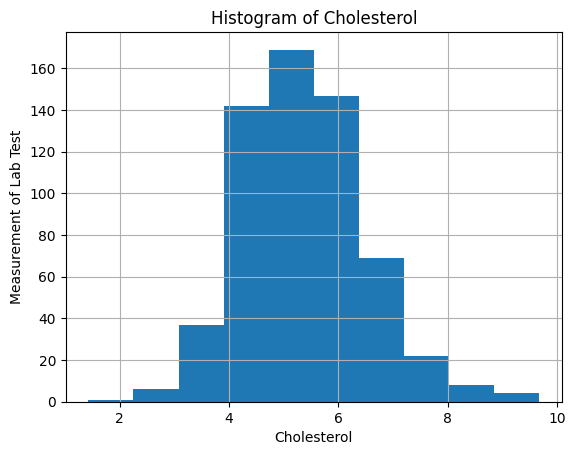

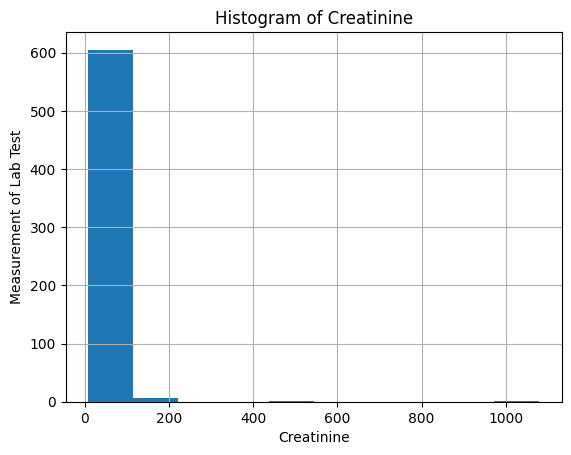

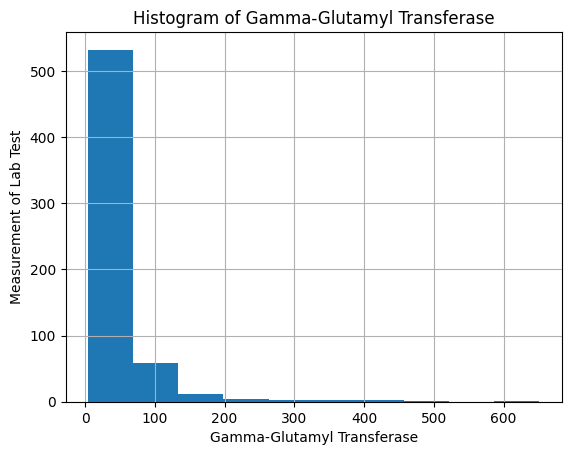

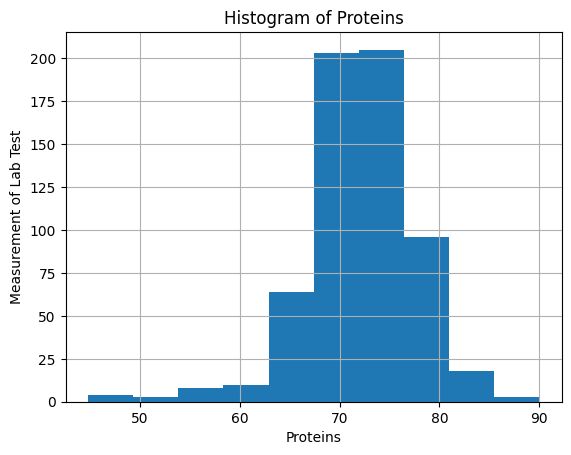

In [309]:
#Histograms of laboratory tests

columns = ['Albumin', 'Alkaline Phosphatase', 'Alanine Transaminase',
            'Aspartate Transamimase', 'Bilirubin',
            'Acetylcholinesterase', 'Cholesterol', 'Creatinine',
            'Gamma-Glutamyl Transferase', 'Proteins'] # make list of columns for loop

for col in columns: #loop through each column making a histogram
    histogram = labvaluesdf.hist(col) # Produce histogram
    
    plt.title(f'Histogram of {col.title()}') # set title, use title function
    plt.ylabel('Measurement of Lab Test') #label Y axis
    plt.xlabel(col.title()) #label X axis, use title function

## Section 7-List: Get some of your information into a list. Process each item in the list (use for or comprehensions as you like). 

In [310]:
# Get information into lists filtered into specific values

abnormal_AST = [AST for AST in labvaluesdf['Aspartate Transamimase'].tolist() if AST > 34] # filter for AST levels greater than 34(abnormal)

print(f'list of abnormal AST levels', (abnormal_AST))

abnormal_ALT = [ALT for ALT in labvaluesdf['Alanine Transaminase'].tolist() if ALT > 35] #filter for ALT levels greater than 35(abnormal female range used)

print(f'list of abnormal ALT levels', (abnormal_ALT))


list of abnormal AST levels [52.6, 38.0, 40.3, 34.9, 46.2, 35.5, 56.2, 46.9, 38.4, 46.9, 36.7, 44.7, 44.1, 43.7, 43.9, 45.7, 35.1, 42.2, 35.3, 60.6, 35.0, 37.6, 36.8, 43.0, 43.4, 34.9, 50.0, 37.0, 49.3, 40.5, 188.7, 40.3, 42.3, 36.7, 35.9, 52.6, 35.8, 37.9, 47.2, 41.1, 34.8, 34.3, 52.6, 39.6, 35.7, 37.3, 34.8, 34.4, 35.6, 37.5, 34.2, 34.8, 34.8, 38.9, 52.3, 41.5, 43.6, 39.0, 39.5, 69.2, 42.4, 43.6, 39.6, 39.3, 77.2, 38.9, 46.7, 130.6, 95.2, 43.0, 146.6, 67.0, 164.2, 187.7, 37.8, 39.0, 45.0, 96.2, 60.9, 48.4, 53.5, 77.6, 39.0, 38.1, 132.8, 324.0, 63.2, 38.3, 46.0, 114.4, 83.5, 114.7, 125.0, 69.1, 62.0, 75.0, 106.0, 43.0, 187.9, 55.9, 74.5, 41.3, 90.0, 161.9, 68.9, 35.8, 42.1, 39.0, 70.0, 125.0, 60.0, 35.6, 60.2, 263.1, 101.9, 113.0, 102.0, 185.0, 66.6, 319.8, 123.0, 80.3, 181.8, 110.1, 65.2, 95.4, 143.2, 54.0, 90.4, 55.7, 36.3, 150.0, 285.8, 110.3, 44.4, 99.0, 62.0, 80.0]
list of abnormal ALT levels [36.2, 35.8, 38.9, 46.7, 97.8, 36.9, 35.8, 47.1, 37.1, 37.2, 53.5, 103.6, 40.8, 48.5, 35

## Section 8-Filter: Use filter() to show only part of the information. 

In [311]:

labvaluesdf.filter(['Age', 'Sex', 'Alanine Transaminase','Aspartate Transamimase', 'Bilirubin']) #filtered for big indicators of liver disease

,Age,Sex,Alanine Transaminase,Aspartate Transamimase,Bilirubin
1,32,m,7.7,22.1,7.5
2,32,m,18.0,24.7,3.9
3,32,m,36.2,52.6,6.1
4,32,m,30.6,22.6,18.9
5,32,m,32.6,24.8,9.6
...,...,...,...,...,...
611,62,f,5.9,110.3,50.0
612,64,f,2.9,44.4,20.0
613,64,f,3.5,99.0,48.0
614,46,f,39.0,62.0,20.0


## Section 9-Map: Use map() to transform some of the data.

In [318]:
# define function to give risk of liver disease based on Aspartate Transminase levels

def liver_disease_risk(Risk):
    if Risk < 34:
        return 'None'
    elif 34 <= Risk <500:
        return 'Elevated'
    else: 
        return 'Liver Disease of Injury'

# use map() function to transform data
labvaluesdf['Risk'] = labvaluesdf['Aspartate Transamimase'].map(liver_disease_risk)

#display data
print(labvaluesdf[['Age', 'Sex', 'Aspartate Transamimase', 'Risk']])

     Age Sex  Aspartate Transamimase      Risk
1     32   m                    22.1      None
2     32   m                    24.7      None
3     32   m                    52.6  Elevated
4     32   m                    22.6      None
5     32   m                    24.8      None
..   ...  ..                     ...       ...
611   62   f                   110.3  Elevated
612   64   f                    44.4  Elevated
613   64   f                    99.0  Elevated
614   46   f                    62.0  Elevated
615   59   f                    80.0  Elevated

[615 rows x 4 columns]
